# Topic Modeling on TripAdvisor Reviews 

- Create wordclouds for reviews on Gardens by the Bay
- Topic modeling 

In [1]:
#import the relevant libraries 
import numpy as np 
import pandas as pd 
import nltk
import re
#to display all graphs plotted 
%matplotlib inline

In [2]:
#import the relevant nlp libraries
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Step1: Clean the text

In [3]:
# load the reviews 
df = pd.read_excel('Garden_By_the_Bay_latest.xlsx')
df.head()

,date,rating,title,review
0,2018-10-25,50,Don??t miss this!,"Well worth a visit, especially after dark when..."
1,2018-10-25,50,First time going gardens by the bay,Is was a very enjoyable day with all the beaut...
2,2018-10-25,50,Trip with my friends,So wonderful and so great for the light and so...
3,2018-10-25,30,Missing direction and information,It was very enjoy full visit to garden but mai...
4,2018-10-25,50,If you miss this.. then you are a fool,I??m going to review this from a typical mans...


## Clean each review
- remove the symbols 
- remove \r and \n 
- change all string to lower 


In [6]:
# create a function to clean the text
def clean_text(r):
        r1 = re.sub(r"[®'&$\?’\"\-();:!\\/(\)+:[\]]", '', r) #remove all symbols
        r1 = r1.replace('\r', '') #replace \r into space 
        r1 = r1.replace('\n', '')#replace \n into space
        r1 = r1.replace('\x80', '')
        r1 = r1.replace('.', ' ')
        r1 = r1.replace(',', ' ')
        r1 = r1.replace('? ?', '')
        r1 = r1.replace('Show less', '')# replace all show less phrase into space
        r1 = r1.lower()
        r1 = r1.strip() #remove whitespace
        r1 = re.sub(r"[\s]+", ' ', r1) #replace multiple whitespace into a single space
        return r1 
    

In [7]:
# clean the review column 
df.review = df.review.apply(clean_text)
# convert the column to list 
df.head()

,date,rating,title,review
0,2018-10-25,50,Don??t miss this!,well worth a visit especially after dark when ...
1,2018-10-25,50,First time going gardens by the bay,is was a very enjoyable day with all the beaut...
2,2018-10-25,50,Trip with my friends,so wonderful and so great for the light and so...
3,2018-10-25,30,Missing direction and information,it was very enjoy full visit to garden but mai...
4,2018-10-25,50,If you miss this.. then you are a fool,im going to review this from a typical mans po...


# Step 2: Filtering reviews based on rating


## Run the following cell to filter reviews above or below certain number of starts 

In [8]:
# set your conditions here 
# get reviews above 4 stars
df_filtered = df[df.rating <= 30] 
# get reviews below 3 stars
#df = df[df.rating <= 30]

In [9]:
df_filtered.head()

,date,rating,title,review
3,2018-10-25,30,Missing direction and information,it was very enjoy full visit to garden but mai...
7,2018-10-24,30,Good if you have interest in flowers,else you can skip it i didnt find it interesti...
44,2018-10-23,30,Sunflower show,quite disappointed with the sunflower show the...
77,2018-10-21,30,Disappointing for Australians,i had read all the hype about the flower dome ...
81,2018-10-20,30,Indoor gardens - massive domes which are an en...,they have grown all kinds of plants saw the pi...


In [10]:
# store all reviews into a list 
review = df_filtered.review.tolist()

In [33]:
review

['it was very enjoy full visit to garden but main problem we faced was improper direction and information board placed at site should management look to the subject it will be a big help for tourists',
 'else you can skip it i didnt find it interesting and felt bored i dont have much interest in flowers you may skip this actually',
 'quite disappointed with the sunflower show the flowers looked very tired and was expecting them to be a lot taller not sure it was worth the money signs around the park itself are very confusing to find places to eat',
 'i had read all the hype about the flower dome and the cloud dome so was really looking forward to them i battled the crowds lined up for a ticket and lined up to enter the flower dome the first section was an australian garden it looked like my own garden then there was daisies azaleas orchids sunflowers all things that i see in my own garden neighbours gardens flower power bunnings i can appreciate that other cultures and societies dont h

# Step 3: Text Normatization- Lemmatization 

In [19]:

from nltk.stem import WordNetLemmatizer

def lemmatize(list_of_review):
    
    #join all the reviews into a long text and perform split
    text = ' '.join(list_of_review)
    tokens = word_tokenize(text) 
    
    #POS tagging
    tagged_tokens = nltk.pos_tag(tokens) 
    
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for pair in tagged_tokens:
        word, tag = pair
        try:#Try runnning this
            lemmatized.append(lemmatizer.lemmatize(word, pos=tag[0].lower()))
        except KeyError: #if it doesnt work, return the word 
            lemmatized.append(word)
    return lemmatized

In [20]:
lemmatized = lemmatize(review)

In [21]:
lemmatized[:10]

['it', 'be', 'very', 'enjoy', 'full', 'visit', 'to', 'garden', 'but', 'main']

# Step 4: Remove Stop Words

In [22]:
final_list_of_words = []
for i in lemmatized :
    # Use not in stopwords.words() to check if the word is a stop word
    if i not in stopwords.words():
        final_list_of_words.append(i)


In [23]:
print('Preview the top 20 words:', final_list_of_words[:20])
print('Length of final list of words',len(final_list_of_words))

Preview the top 20 words: ['enjoy', 'full', 'visit', 'garden', 'main', 'problem', 'improper', 'direction', 'information', 'board', 'place', 'site', 'management', 'look', 'subject', 'big', 'help', 'tourist', 'else', 'skip']
Length of final list of words 1123


# Step 5: Create a Wordcloud

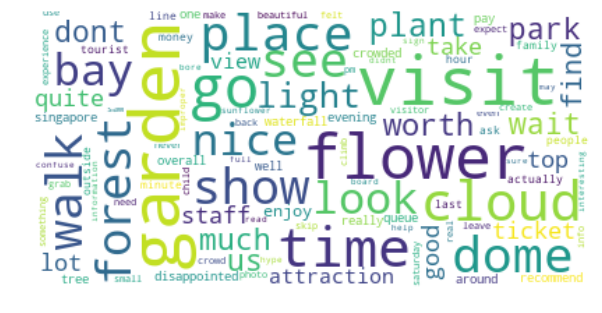

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(final_list_of_words)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white", 
                      collocations = False).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Remove words that are not meaningful

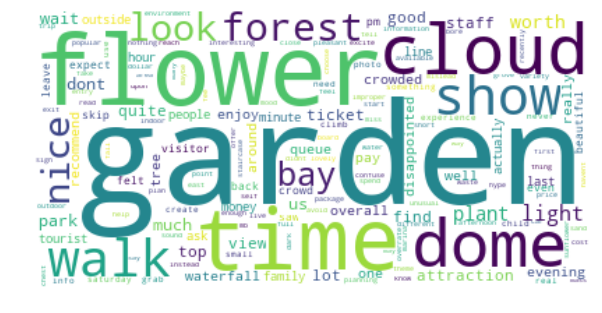

In [25]:
# Create stopword list:
stopwords1 = set(STOPWORDS)
stopwords1.update(["visit", "see", "go", "take",'make','singapore','sure','place'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords1, 
                      background_color="white",
                      collocations = False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

# LDA 

In [26]:
import gensim
from gensim import corpora
from nltk.stem.wordnet import WordNetLemmatizer
import string

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [27]:
# convert all reviews into 
doc_complete = review

In [28]:
doc_complete[:5]

['it was very enjoy full visit to garden but main problem we faced was improper direction and information board placed at site should management look to the subject it will be a big help for tourists',
 'else you can skip it i didnt find it interesting and felt bored i dont have much interest in flowers you may skip this actually',
 'quite disappointed with the sunflower show the flowers looked very tired and was expecting them to be a lot taller not sure it was worth the money signs around the park itself are very confusing to find places to eat',
 'i had read all the hype about the flower dome and the cloud dome so was really looking forward to them i battled the crowds lined up for a ticket and lined up to enter the flower dome the first section was an australian garden it looked like my own garden then there was daisies azaleas orchids sunflowers all things that i see in my own garden neighbours gardens flower power bunnings i can appreciate that other cultures and societies dont h

In [29]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

In [30]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [31]:
#running LDA model
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = 15, id2word = dictionary, passes = 50)

In [32]:
#Results
print(ldamodel.print_topics(num_topics = 15, num_words = 5))

[(0, '0.025*"staff" + 0.025*"flower" + 0.025*"fake" + 0.025*"taking" + 0.025*"u"'), (1, '0.033*"flower" + 0.030*"cloud" + 0.027*"dome" + 0.027*"garden" + 0.024*"see"'), (2, '0.044*"walk" + 0.030*"tree" + 0.015*"however" + 0.015*"child" + 0.015*"good"'), (3, '0.018*"u" + 0.018*"garden" + 0.018*"show" + 0.018*"plant" + 0.018*"grab"'), (4, '0.002*"cloud" + 0.002*"forest" + 0.002*"fee" + 0.002*"view" + 0.002*"see"'), (5, '0.027*"skip" + 0.014*"place" + 0.014*"flower" + 0.014*"enjoy" + 0.014*"visited"'), (6, '0.037*"nice" + 0.028*"visit" + 0.028*"garden" + 0.019*"place" + 0.010*"worth"'), (7, '0.028*"garden" + 0.024*"show" + 0.019*"bay" + 0.014*"never" + 0.014*"light"'), (8, '0.056*"time" + 0.028*"cloud" + 0.028*"forest" + 0.021*"visited" + 0.021*"waiting"'), (9, '0.039*"place" + 0.020*"crowded" + 0.020*"really" + 0.010*"attraction" + 0.010*"people"'), (10, '0.035*"quite" + 0.021*"visit" + 0.014*"lot" + 0.014*"worth" + 0.014*"sign"'), (11, '0.002*"grab" + 0.002*"east" + 0.002*"garden" + 0.0